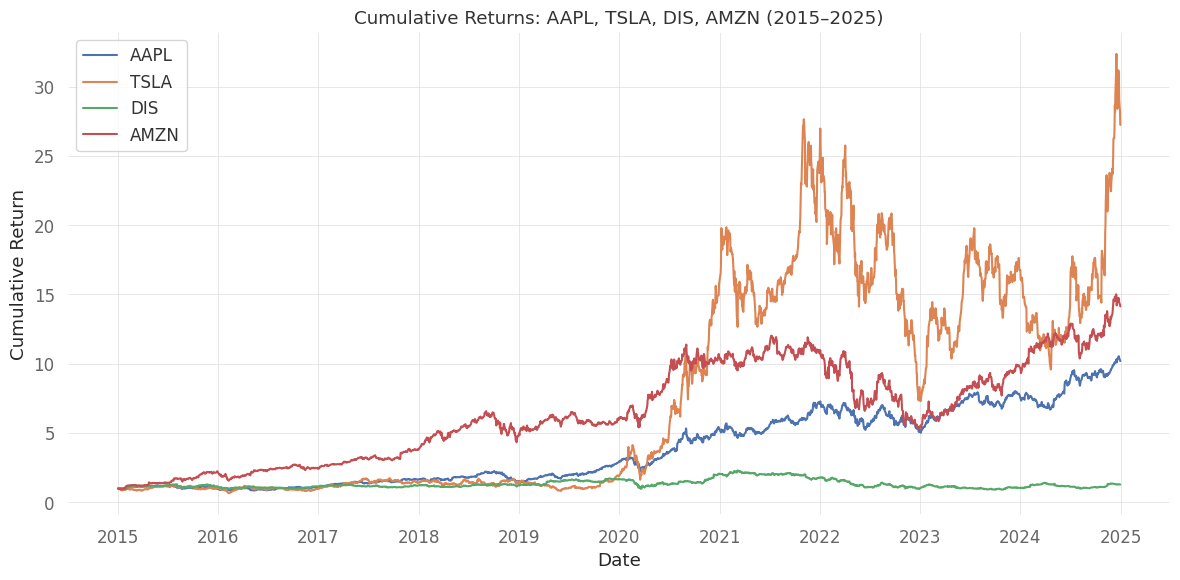

<Figure size 1000x600 with 0 Axes>

In [6]:
!pip install quantstats

#import essential libraries
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import yfinance as yf

#daily returns for four different US stocks at the same time window
aapl = qs.utils.download_returns('AAPL')
aapl = aapl.loc['2015.01.01':'2025.01.01']
aapl.head()

tsla = qs.utils.download_returns('TSLA')
tsla = tsla.loc['2015.01.01':'2025.01.01']
tsla.head()

dis = qs.utils.download_returns('DIS')
dis = dis.loc['2015.01.01':'2025.01.01']
dis.head()

amzn = qs.utils.download_returns('AMZN')
amzn = amzn.loc['2015.01.01':'2025.01.01']
amzn.head()

# Combine all returns into one DataFrame
returns_df = pd.concat([aapl, tsla, dis, amzn], axis=1)
returns_df.columns = ['AAPL', 'TSLA', 'DIS', 'AMZN']

# Drop any rows with missing values (in case of non-overlapping dates)
returns_df.dropna(inplace=True)

# Calculate cumulative returns
cumulative_returns = (1 + returns_df).cumprod()

# Plot
plt.figure(figsize=(12, 6))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.title('Cumulative Returns: AAPL, TSLA, DIS, AMZN (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('cumulative_returns.png')


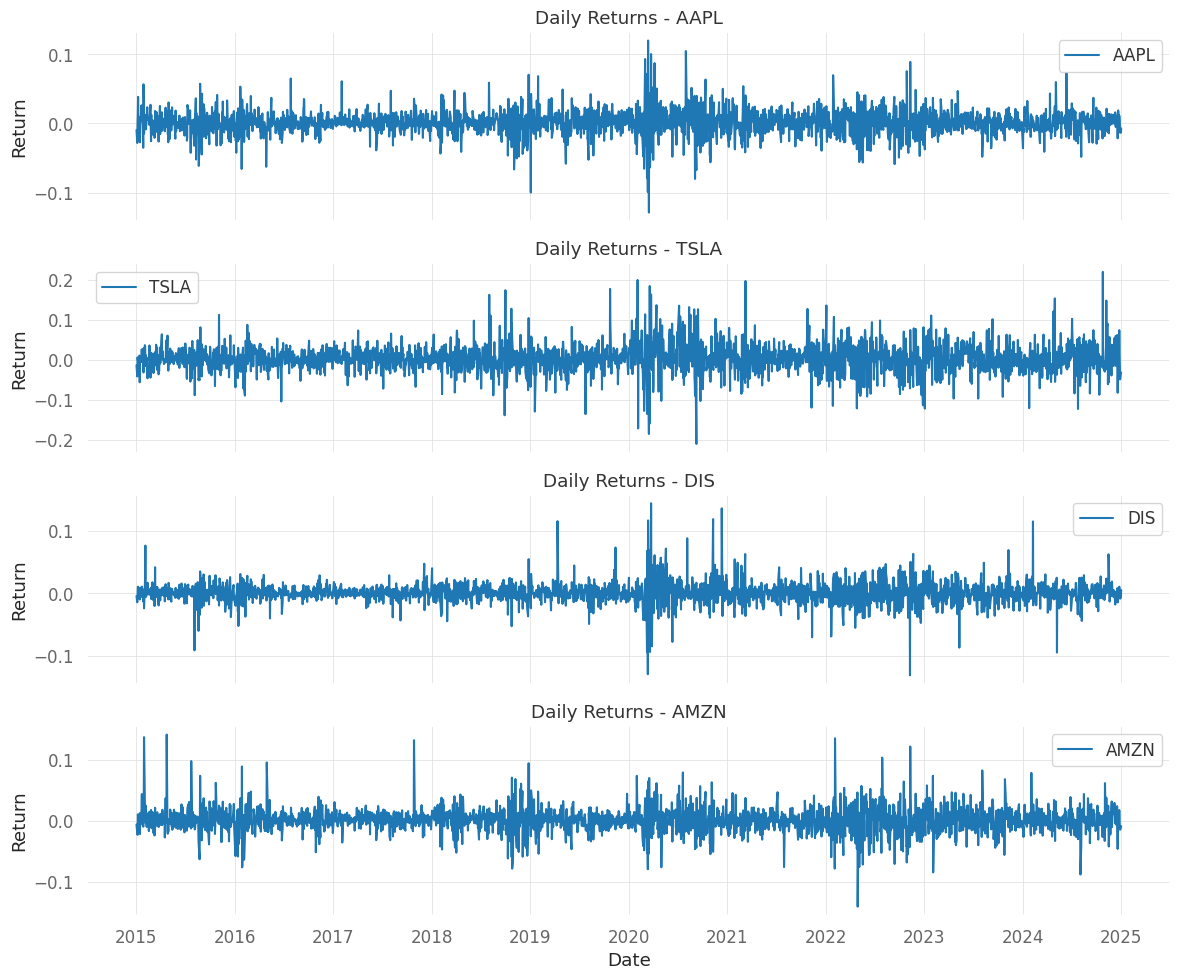

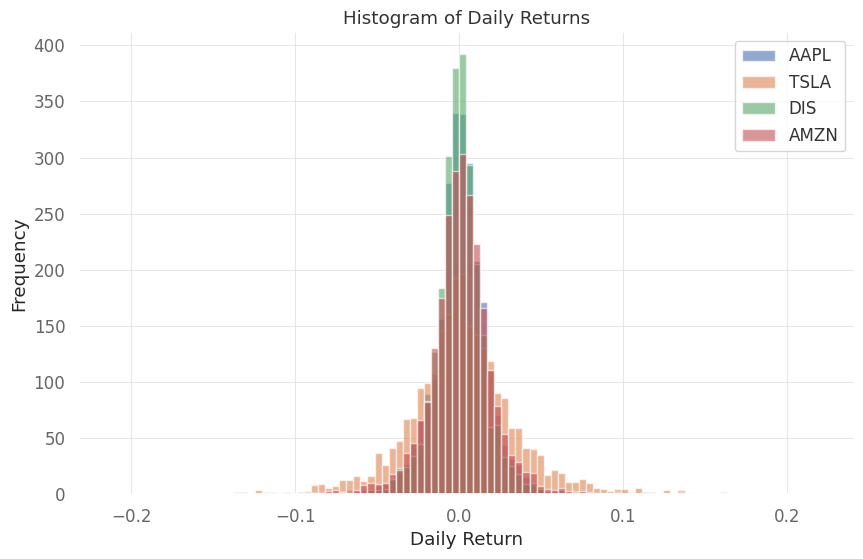

Kurtosis of Daily Returns:
AAPL     5.314283
TSLA     4.396809
DIS     11.333784
AMZN     6.174165
dtype: float64


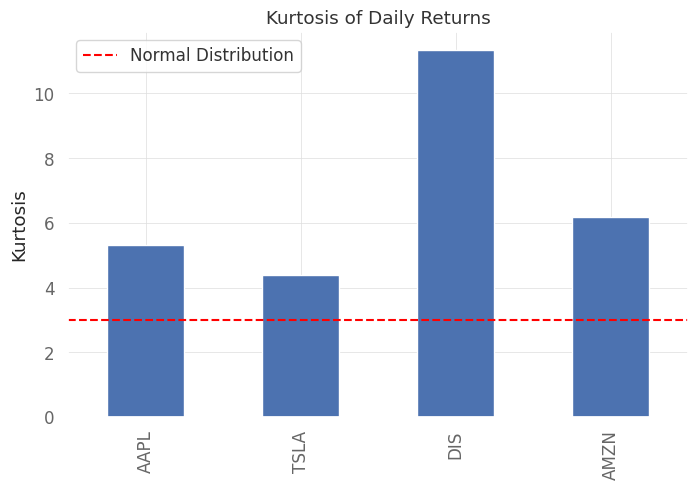

Skewness of Daily Returns:
AAPL   -0.002434
TSLA    0.275798
DIS     0.330370
AMZN    0.400487
dtype: float64


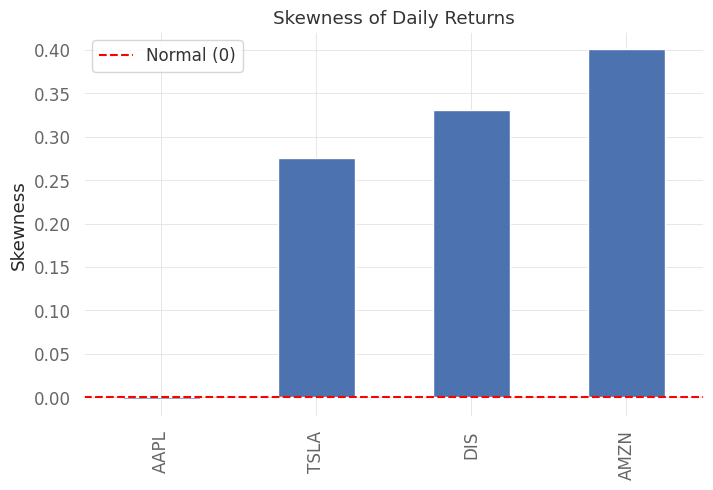

Standard Deviation of Daily Returns:
AAPL    0.017927
TSLA    0.036003
DIS     0.017534
AMZN    0.020646
dtype: float64


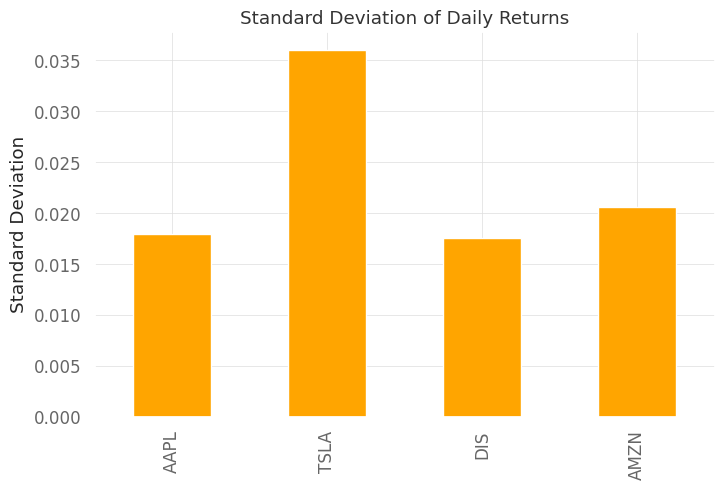

Correlation Matrix of Daily Returns:
          AAPL      TSLA       DIS      AMZN
AAPL  1.000000  0.418198  0.413402  0.553424
TSLA  0.418198  1.000000  0.282770  0.387726
DIS   0.413402  0.282770  1.000000  0.362817
AMZN  0.553424  0.387726  0.362817  1.000000


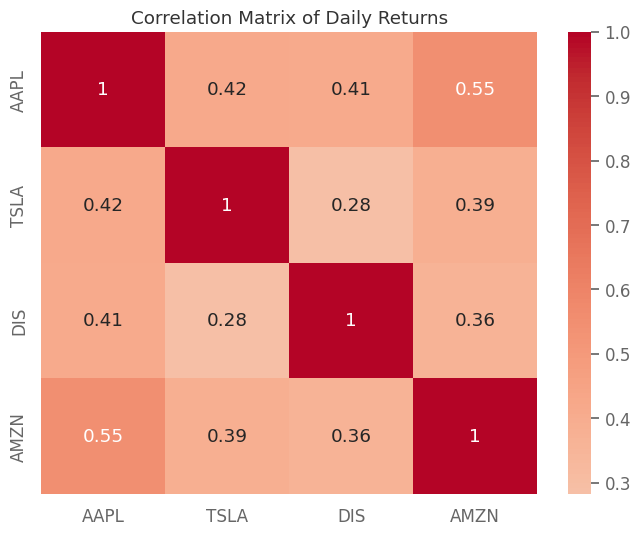

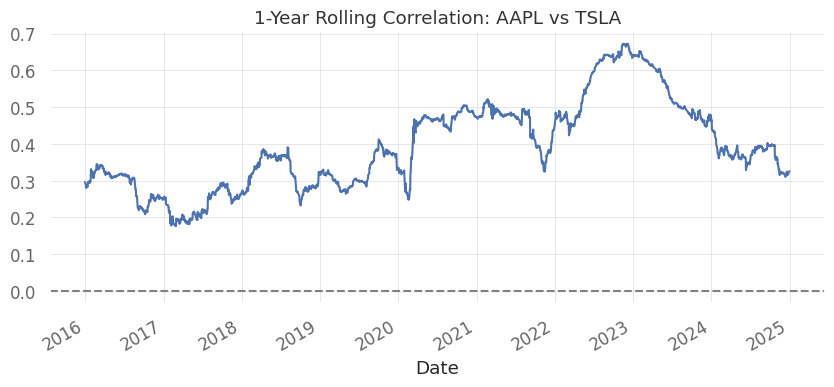

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

for i, ticker in enumerate(returns_df.columns):
    axes[i].plot(returns_df[ticker], label=ticker, color='tab:blue')
    axes[i].set_ylabel('Return')
    axes[i].set_title(f'Daily Returns - {ticker}')
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

#histogram returns
returns_df.plot(kind='hist', bins=100, alpha=0.6, figsize=(10, 6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.grid(True)
plt.show()

#kurtosis
kurtosis_values = returns_df.kurtosis()
print("Kurtosis of Daily Returns:")
print(kurtosis_values)

kurtosis_values.plot(kind='bar', title='Kurtosis of Daily Returns', figsize=(8,5), grid=True)
plt.ylabel('Kurtosis')
plt.axhline(3, color='red', linestyle='--', label='Normal Distribution')
plt.legend()
plt.show()

#skewness
skewness_values = returns_df.skew()
print("Skewness of Daily Returns:")
print(skewness_values)

skewness_values.plot(kind='bar', title='Skewness of Daily Returns', figsize=(8,5), grid=True)
plt.ylabel('Skewness')
plt.axhline(0, color='red', linestyle='--', label='Normal (0)')
plt.legend()
plt.show()

#standard deviation
std_dev = returns_df.std()
print("Standard Deviation of Daily Returns:")
print(std_dev)

std_dev.plot(kind='bar', title='Standard Deviation of Daily Returns', figsize=(8,5), color='orange', grid=True)
plt.ylabel('Standard Deviation')
plt.show()

#corelation matrix
returns_df = pd.concat([aapl, tsla, dis, amzn], axis=1)
returns_df.columns = ['AAPL', 'TSLA', 'DIS', 'AMZN']

corr_matrix = returns_df.corr()
print("Correlation Matrix of Daily Returns:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Daily Returns")
plt.show()

#rolling corelation matrix
rolling_corr = returns_df['AAPL'].rolling(252).corr(returns_df['TSLA'])
rolling_corr.plot(figsize=(10,4), title='1-Year Rolling Correlation: AAPL vs TSLA')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()


<ipython-input-4-2394592188>:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2015-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


AAPL -> Alpha: 0.00051, Beta: 1.19
TSLA -> Alpha: 0.00125, Beta: 1.49
DIS -> Alpha: -0.00022, Beta: 0.98
AMZN -> Alpha: 0.00072, Beta: 1.15
AAPL: Sharpe Ratio = 0.96
TSLA: Sharpe Ratio = 0.86
DIS: Sharpe Ratio = 0.23
AMZN: Sharpe Ratio = 0.97


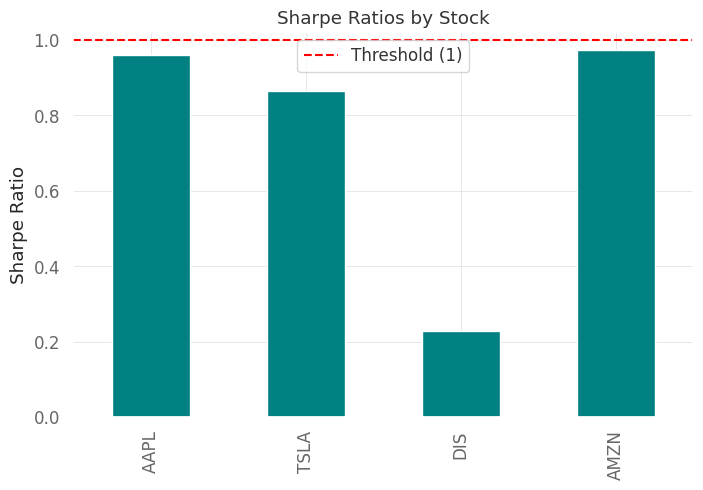

In [4]:
import statsmodels.api as sm

# Download market index (e.g., S&P 500)
sp500 = yf.download('^GSPC', start='2015-01-01', end='2025-01-01')['Close']
sp500_returns = sp500.pct_change().dropna()

for stock in ['AAPL', 'TSLA', 'DIS', 'AMZN']:
    data = pd.concat([returns_df[stock], sp500_returns], axis=1).dropna()
    data.columns = [stock, 'SP500']

    X = sm.add_constant(data['SP500'])
    model = sm.OLS(data[stock], X).fit()

    alpha = model.params['const']
    beta = model.params['SP500']

    print(f"{stock} -> Alpha: {alpha:.5f}, Beta: {beta:.2f}")

#sharpe ratio
def sharpe_ratio(returns, risk_free_rate=0.0, periods_per_year=252):
    # Excess returns
    excess_returns = returns - risk_free_rate / periods_per_year

    # Annualized Sharpe Ratio
    return (excess_returns.mean() / returns.std()) * np.sqrt(periods_per_year)

for stock in returns_df.columns:
    sr = sharpe_ratio(returns_df[stock])
    print(f"{stock}: Sharpe Ratio = {sr:.2f}")

#sharpe ratio visualisation
sharpe_dict = {stock: sharpe_ratio(returns_df[stock]) for stock in returns_df.columns}
pd.Series(sharpe_dict).plot(kind='bar', title='Sharpe Ratios by Stock', figsize=(8,5), color='teal', grid=True)
plt.ylabel('Sharpe Ratio')
plt.axhline(1, color='red', linestyle='--', label='Threshold (1)')
plt.legend()
plt.show()
